# **mohammad amin kiani 4003613052**

# load https://huggingface.co/datasets/SLPL/naab Corpus from NLTK:

In [ ]:
!rm -rf ~/.cache/huggingface
!rm -rf /root/.cache/datasets

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2


In [ ]:
from datasets import load_dataset

dataset = load_dataset("SLPL/naab", split="train[:10%]")


https://github.com/Sharif-SLPL/t5-fa/tree/main/preprocess

In [ ]:
dataset = load_dataset("SLPL/naab", split="train", streaming=True)


In [ ]:
dataset = load_dataset("SLPL/naab", split="train[:1000]")


In [3]:
from datasets import load_dataset
import json
import os

# اتصال به گوگل درایو
from google.colab import drive
drive.mount('/content/drive')

SAVE_PATH = "/content/drive/MyDrive/naab/naab_streamed_10percent.jsonl"
os.makedirs(os.path.dirname(SAVE_PATH), exist_ok=True)

# مقدار نهایی هدف
LIMIT = 25000000

# شمارش نمونه‌های قبلاً ذخیره‌شده
existing = 0
if os.path.exists(SAVE_PATH):
    with open(SAVE_PATH, "r", encoding="utf-8") as f:
        existing = sum(1 for _ in f)

print(f" {existing} نمونه قبلاً ذخیره شده.")

# اگر به حد رسیده‌ایم، ادامه نده
if existing >= LIMIT:
    print(" قبلاً به ۱۰٪ مورد نظر رسیده‌ایم. نیازی به ادامه نیست.")
else:
    # شروع لود stream از همون‌جا
    streamed = load_dataset("SLPL/naab", split="train", streaming=True, trust_remote_code=True)

    count = existing
    with open(SAVE_PATH, "a", encoding="utf-8") as f:
        for example in streamed:
            if count < existing:
                count += 1
                continue

            json.dump(example, f)
            f.write("\n")
            count += 1

            if count % 1000 == 0:
                print(f" {count} نمونه ذخیره شد...")

            if count >= LIMIT:
                print(" به 10٪ مورد نظر رسیدیم.")
                break

Mounted at /content/drive
 25000003 نمونه قبلاً ذخیره شده.
 قبلاً به ۱۰٪ مورد نظر رسیده‌ایم. نیازی به ادامه نیست.


In [ ]:
!pip install -q tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.9 MB/s eta 0:00:00


In [14]:
import nltk
import random

import string
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import re
import math
from nltk.corpus import stopwords

# !pip install datasets hazm
from datasets import load_dataset
# from hazm import Normalizer, word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# پاکسازی کامل کش‌های خراب
nltk.download('popular')
nltk.download('all')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]   

True

In [ ]:
!pip uninstall -y hazm nltk
!pip install hazm==0.10.0 nltk==3.8.1


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 39.1 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9300 sha256=a2d6806105f52d8d0c8cb881aae462b028bff1d8f97e37619b4c

In [ ]:
from hazm import Normalizer, word_tokenize

normalizer = Normalizer()
text = "این یک متن نمونه برای تست نرمال‌سازی و توکن‌سازی است."
print(word_tokenize(normalizer.normalize(text)))


['این', 'یک', 'متن', 'نمونه', 'برای', 'تست', 'نرمال\u200cسازی', 'و', 'توکن\u200cسازی', 'است', '.']


# پیش پردازش

In [ ]:
dataset = []
with open(SAVE_PATH, encoding="utf-8") as f:
    for line in f:
        dataset.append(json.loads(line))

print("تعداد نمونه‌های ذخیره‌شده:", len(dataset))


تعداد نمونه‌های ذخیره‌شده: 25000002


In [ ]:
normalizer = Normalizer()

def preprocess_text(text):
    text = normalizer.normalize(text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if len(w) > 1 and w.isalpha()]
    return tokens

sentences = [preprocess_text(example["text"]) for example in dataset]


KeyboardInterrupt: 

In [ ]:
normalizer = Normalizer()

def preprocess_text(text):
    text = normalizer.normalize(text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if len(w) > 1 and w.isalpha()]
    return tokens

sentences = [preprocess_text(example["text"]) for example in dataset[:10000]]


In [ ]:
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm

def process_dataset_parallel(dataset):
    with ProcessPoolExecutor() as executor:
        results = list(tqdm(executor.map(preprocess_text, [item["text"] for item in dataset]), total=len(dataset)))
    return results

sentences = process_dataset_parallel(dataset[:50000])  # شروع کن با ۵۰ هزار


100%|██████████| 50000/50000 [00:11<00:00, 4526.11it/s]


# پیاده‌سازی مدل

In [ ]:
# import torch
# import torch.nn as nn

# class SkipGramModel(nn.Module):
#     def __init__(self, vocab_size, embedding_dim):
#         super(SkipGramModel, self).__init__()
#         self.embeddings = nn.Embedding(vocab_size, embedding_dim)
#         self.output = nn.Linear(embedding_dim, vocab_size)

#     def forward(self, center_word):
#         embeds = self.embeddings(center_word)
#         out = self.output(embeds)
#         return out

#--------------------------------------------------------------------- if tpu use tensor instead of torch:
import numpy as np
from collections import Counter

# ساخت واژگان
words = [w for sent in sentences for w in sent]
word_counts = Counter(words)
vocab = [w for w, c in word_counts.items() if c >= 5]
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}
V = len(word2idx)

# ساخت دیتای skip-gram با پنجره 2
def generate_skipgram_data(sentences, window_size=2):
    pairs = []
    for sent in sentences:
        indices = [word2idx[w] for w in sent if w in word2idx]
        for i, center in enumerate(indices):
            for j in range(max(0, i - window_size), min(len(indices), i + window_size + 1)):
                if i != j:
                    pairs.append((center, indices[j]))
    return pairs

pairs = generate_skipgram_data(sentences)
print(f"Total skip-gram pairs: {len(pairs)}")


Total skip-gram pairs: 3345964


In [ ]:
!pip uninstall -y hazm gensim
!pip install numpy==1.26.4 tensorflow==2.19


Found existing installation: hazm 0.10.0
Uninstalling hazm-0.10.0:
  Successfully uninstalled hazm-0.10.0
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3


In [ ]:
import tensorflow as tf

with strategy.scope():
    embedding_dim = 100

    input_center = tf.keras.Input(shape=(), dtype=tf.int32)
    embedding = tf.keras.layers.Embedding(V, embedding_dim)(input_center)

    output = tf.keras.layers.Dense(V, activation='softmax')(embedding)
    model = tf.keras.Model(inputs=input_center, outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# آماده‌سازی دیتا برای آموزش
centers = np.array([c for c, _ in pairs])
contexts = np.array([w for _, w in pairs])

# آموزش مدل
model.fit(centers, contexts, epochs=5, batch_size=1024)


AttributeError: module 'numpy' has no attribute 'dtypes'

In [ ]:
weights = model.get_weights()[0]
print("بردار کلمه 'کتاب':", weights[word2idx['کتاب']])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def most_similar(word, topn=5):
    if word not in word2idx:
        return []
    idx = word2idx[word]
    vec = weights[idx].reshape(1, -1)
    sims = cosine_similarity(vec, weights)[0]
    top_indices = np.argsort(sims)[-topn-1:-1][::-1]
    return [(idx2word[i], sims[i]) for i in top_indices]

print("کلمات مشابه 'کتاب':", most_similar('کتاب'))


# نمایش گرافیکی بردارها

# PCA :

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words_sample = list(word2idx.keys())[:100]
vectors = np.array([weights[word2idx[w]] for w in words_sample])
pca = PCA(n_components=2).fit_transform(vectors)

plt.figure(figsize=(10,8))
plt.scatter(pca[:,0], pca[:,1])
for i, word in enumerate(words_sample):
    plt.annotate(word, (pca[i,0], pca[i,1]))
plt.title("Word Vectors (PCA Reduced)")
plt.grid(True)
plt.show()


# TSNE :

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# فرض کنید embeddings ماتریس بردارهای کلمات است
tsne = TSNE(n_components=2)
reduced = tsne.fit_transform(embeddings)

plt.scatter(reduced[:, 0], reduced[:, 1])
plt.show()


# All in One

In [6]:
!pip install -q tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.7 MB/s eta 0:00:00


In [7]:
# ----------------------------  Imports ----------------------------
import json, re, os
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ----------------------------  Load Dataset ----------------------------
SAVE_PATH = "/content/drive/MyDrive/naab/naab_streamed_10percent.jsonl"

from google.colab import drive
drive.mount('/content/drive')

dataset = []
with open(SAVE_PATH, encoding="utf-8") as f:
    for line in f:
        dataset.append(json.loads(line))

print(" Loaded dataset:", len(dataset))

# ----------------------------  Fast Tokenization ----------------------------
def simple_tokenize(text):
    text = re.sub(r"[\\d\\W_]+", " ", text).strip().lower()
    tokens = text.split()
    return [w for w in tokens if len(w) > 1]

sentences = [simple_tokenize(example["text"]) for example in tqdm(dataset[:100000])]  # برای سرعت بیشتر محدود کن

# ----------------------------  Build Vocabulary ----------------------------
words = [w for sent in sentences for w in sent]
word_counts = Counter(words)
vocab = [w for w, c in word_counts.items() if c >= 5]
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}
V = len(word2idx)
print(" Vocabulary size:", V)

# ----------------------------  Skip-Gram Pairs ----------------------------
def generate_skipgram_data(sentences, window_size=2):
    pairs = []
    for sent in sentences:
        indices = [word2idx[w] for w in sent if w in word2idx]
        for i, center in enumerate(indices):
            for j in range(max(0, i - window_size), min(len(indices), i + window_size + 1)):
                if i != j:
                    pairs.append((center, indices[j]))
    return pairs

pairs = generate_skipgram_data(sentences)
print(" Total skip-gram pairs:", len(pairs))

centers = np.array([c for c, _ in pairs], dtype=np.int32)
contexts = np.array([w for _, w in pairs], dtype=np.int32)

# ----------------------------  TPU Setup ----------------------------
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)
    print(" TPU connected!")
except:
    strategy = tf.distribute.get_strategy()
    print(" TPU not found, using CPU/GPU")

# ----------------------------  Word2Vec Model ----------------------------
with strategy.scope():
    embedding_dim = 100
    input_center = tf.keras.Input(shape=(), dtype=tf.int32)
    embedding = tf.keras.layers.Embedding(V, embedding_dim)(input_center)
    output = tf.keras.layers.Dense(V, activation='softmax')(embedding)

    model = tf.keras.Model(inputs=input_center, outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# ----------------------------  Training ----------------------------
model.fit(centers, contexts, epochs=3, batch_size=1024)
weights = model.get_weights()[0]

# ----------------------------  Semantic Similarity ----------------------------
def most_similar(word, topn=5):
    if word not in word2idx:
        return []
    idx = word2idx[word]
    vec = weights[idx].reshape(1, -1)
    sims = cosine_similarity(vec, weights)[0]
    top_indices = np.argsort(sims)[-topn-1:-1][::-1]
    return [(idx2word[i], sims[i]) for i in top_indices]

print(" مشابه‌ترین کلمات به 'کتاب':", most_similar("کتاب"))

# ----------------------------  PCA Visualization ----------------------------
words_sample = list(word2idx.keys())[:100]
vectors = np.array([weights[word2idx[w]] for w in words_sample])
pca = PCA(n_components=2).fit_transform(vectors)

plt.figure(figsize=(10,8))
plt.scatter(pca[:,0], pca[:,1])
for i, word in enumerate(words_sample):
    plt.annotate(word, (pca[i,0], pca[i,1]))
plt.title("Word Embeddings (PCA)")
plt.grid(True)
plt.show()

# ----------------------------  TSNE Visualization ----------------------------
tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
reduced = tsne.fit_transform(vectors)

plt.figure(figsize=(10,8))
plt.scatter(reduced[:,0], reduced[:,1])
for i, word in enumerate(words_sample):
    plt.annotate(word, (reduced[i,0], reduced[i,1]))
plt.title("Word Embeddings (TSNE)")
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded dataset: 25000003


100%|██████████| 100000/100000 [00:01<00:00, 53856.38it/s]


✅ Vocabulary size: 23045
✅ Total skip-gram pairs: 7850730
⚠️ TPU not found, using CPU/GPU
Epoch 1/3
2600/7667 ━━━━━━━━━━━━━━━━━━━━ 57:16 678ms/step - loss: 8.2818

KeyboardInterrupt: 

In [11]:
import shutil
shutil.rmtree('/usr/local/nltk_data', ignore_errors=True)
print(" کش NLTK پاک شد.")


 کش NLTK پاک شد.


In [12]:
import nltk

nltk.download('punkt', download_dir='/usr/local/nltk_data')
nltk.download('stopwords', download_dir='/usr/local/nltk_data')
nltk.data.path.append('/usr/local/nltk_data')


[nltk_data] Downloading package punkt to /usr/local/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /usr/local/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package punkt to /usr/local/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/local/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Loaded samples: 20001





  0%|          | 0/20001 [00:00<?, ?it/s]


 48%|████▊     | 9529/20001 [00:00<00:00, 95282.59it/s]


100%|██████████| 20001/20001 [00:00<00:00, 85571.06it/s]


 Vocab size: 10000
 Skip-gram pairs: 1075864
 Using CPU/GPU instead
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 270s 256ms/step - loss: 8.6813
 مشابه‌ترین کلمات به 'کتاب': [('فروش', np.float32(0.97321546)), ('زمان', np.float32(0.96647924)), ('دانشجو', np.float32(0.96569824)), ('می\u200cباشد', np.float32(0.96564096)), ('جلسه', np.float32(0.96410155))]


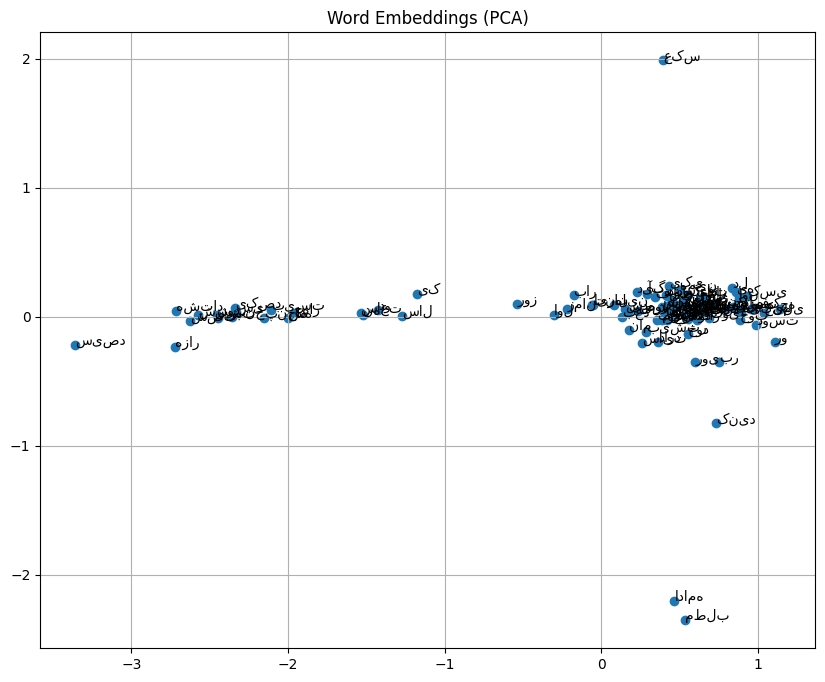

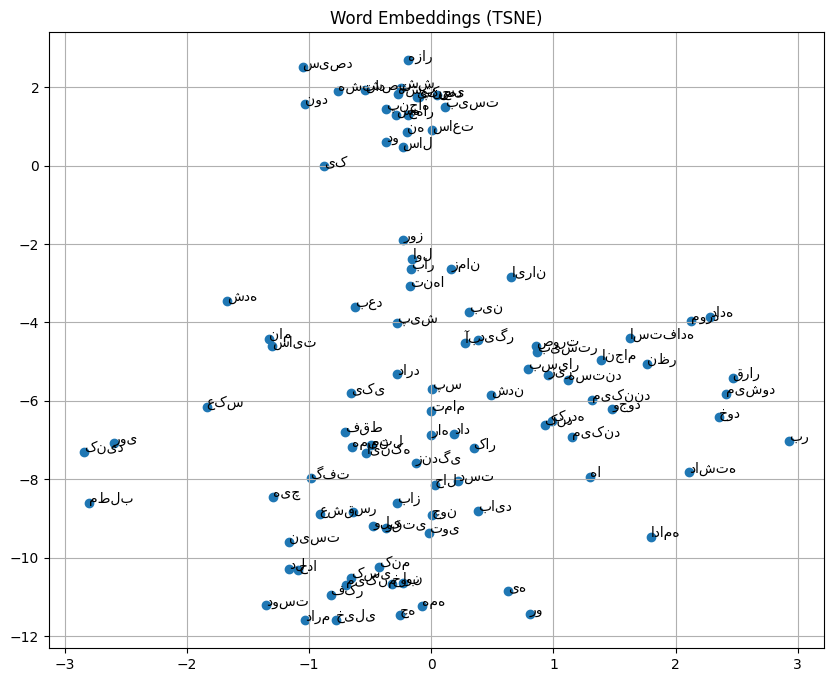

In [15]:
# ------------------------- تنظیمات اولیه و پاکسازی -------------------------
!pip install -q nltk
import nltk
nltk.download('punkt', download_dir='/usr/local/nltk_data')
nltk.download('stopwords', download_dir='/usr/local/nltk_data')
nltk.data.path.append('/usr/local/nltk_data')

import json, re, os
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# ------------------------- بارگذاری داده -------------------------
from google.colab import drive
drive.mount('/content/drive')

SAVE_PATH = "/content/drive/MyDrive/naab/naab_streamed_10percent.jsonl"
dataset = []
with open(SAVE_PATH, encoding="utf-8") as f:
    for i, line in enumerate(f):
        dataset.append(json.loads(line))
        if i >= 20000:
            break

print(" Loaded samples:", len(dataset))

# ------------------------- پیش‌پردازش + stopwords فارسی دستی -------------------------
stop_words = set([
    'از', 'به', 'با', 'برای', 'در', 'که', 'و', 'یا', 'اما', 'اگر', 'تا', 'هم', 'را', 'این', 'آن', 'ما', 'من', 'تو',
    'شما', 'او', 'آنها', 'ایشان', 'می', 'باشد', 'است', 'بود', 'کرد', 'کردن', 'خواهد', 'شود', 'شد', 'نیز', 'هر', 'چند'
])

# def preprocess(text):
#     text = re.sub(r"[\d\W_]+", " ", text).strip().lower()
#     tokens = word_tokenize(text)
#     return [w for w in tokens if len(w) > 1 and w not in stop_words]
def preprocess(text):
    text = re.sub(r"[\\d\\W_]+", " ", text).strip().lower()
    tokens = text.split()
    return [w for w in tokens if len(w) > 1 and w not in stop_words]


sentences = [preprocess(example["text"]) for example in tqdm(dataset)]

# ------------------------- ساخت واژگان محدود -------------------------
words = [w for sent in sentences for w in sent]
word_counts = Counter(words)
most_common = 10000
vocab = [w for w, _ in word_counts.most_common(most_common)]
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}
V = len(word2idx)
print(" Vocab size:", V)

# ------------------------- تولید داده Skip-Gram -------------------------
def generate_skipgram(sentences, window=2):
    pairs = []
    for sent in sentences:
        idxs = [word2idx[w] for w in sent if w in word2idx]
        for i, center in enumerate(idxs):
            for j in range(max(0, i - window), min(len(idxs), i + window + 1)):
                if i != j:
                    pairs.append((center, idxs[j]))
    return pairs

pairs = generate_skipgram(sentences)
print(" Skip-gram pairs:", len(pairs))

centers = np.array([c for c, _ in pairs], dtype=np.int32)
contexts = np.array([w for _, w in pairs], dtype=np.int32)

# ------------------------- اتصال به TPU -------------------------
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)
    print(" TPU connected!")
except:
    strategy = tf.distribute.get_strategy()
    print(" Using CPU/GPU instead")

# ------------------------- ساخت مدل سبک -------------------------
with strategy.scope():
    embedding_dim = 50
    input_center = tf.keras.Input(shape=(), dtype=tf.int32)
    embedding = tf.keras.layers.Embedding(V, embedding_dim)(input_center)
    output = tf.keras.layers.Dense(V, activation='softmax')(embedding)
    model = tf.keras.Model(inputs=input_center, outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# ------------------------- آموزش مدل -------------------------
model.fit(centers, contexts, epochs=1, batch_size=1024)
weights = model.get_weights()[0]

# ------------------------- بررسی شباهت -------------------------
def most_similar(word, topn=5):
    if word not in word2idx:
        return []
    idx = word2idx[word]
    vec = weights[idx].reshape(1, -1)
    sims = cosine_similarity(vec, weights)[0]
    top = np.argsort(sims)[-topn-1:-1][::-1]
    return [(idx2word[i], sims[i]) for i in top]

print(" مشابه‌ترین کلمات به 'کتاب':", most_similar("کتاب"))

# ----------------------------  PCA Visualization ----------------------------
words_sample = list(word2idx.keys())[:100]
vectors = np.array([weights[word2idx[w]] for w in words_sample])
pca = PCA(n_components=2).fit_transform(vectors)

plt.figure(figsize=(10,8))
plt.scatter(pca[:,0], pca[:,1])
for i, word in enumerate(words_sample):
    plt.annotate(word, (pca[i,0], pca[i,1]))
plt.title("Word Embeddings (PCA)")
plt.grid(True)
plt.show()

# ----------------------------  TSNE Visualization ----------------------------
tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
reduced = tsne.fit_transform(vectors)

plt.figure(figsize=(10,8))
plt.scatter(reduced[:,0], reduced[:,1])
for i, word in enumerate(words_sample):
    plt.annotate(word, (reduced[i,0], reduced[i,1]))
plt.title("Word Embeddings (TSNE)")
plt.grid(True)
plt.show()

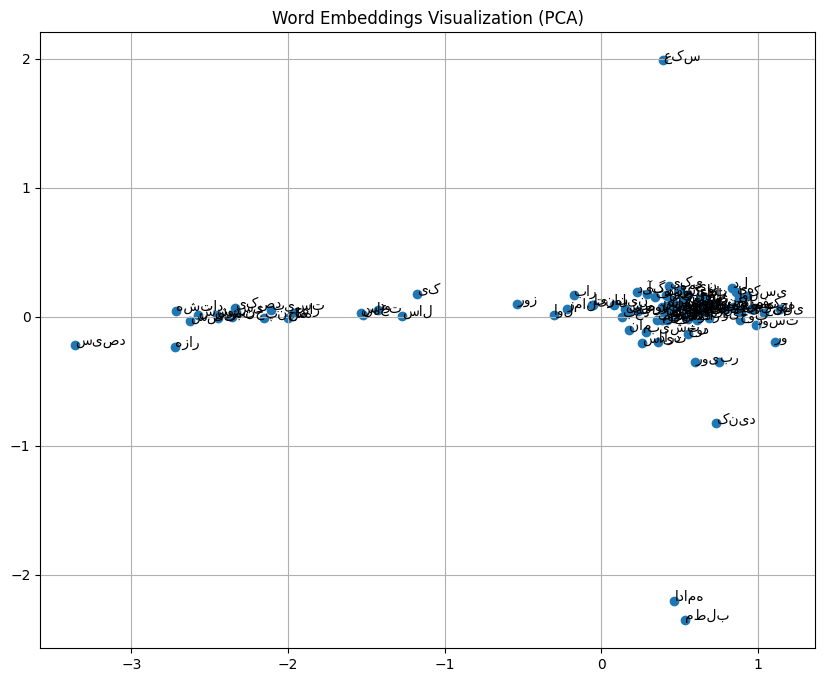

  0%|          | 0/20001 [09:09<?, ?it/s]


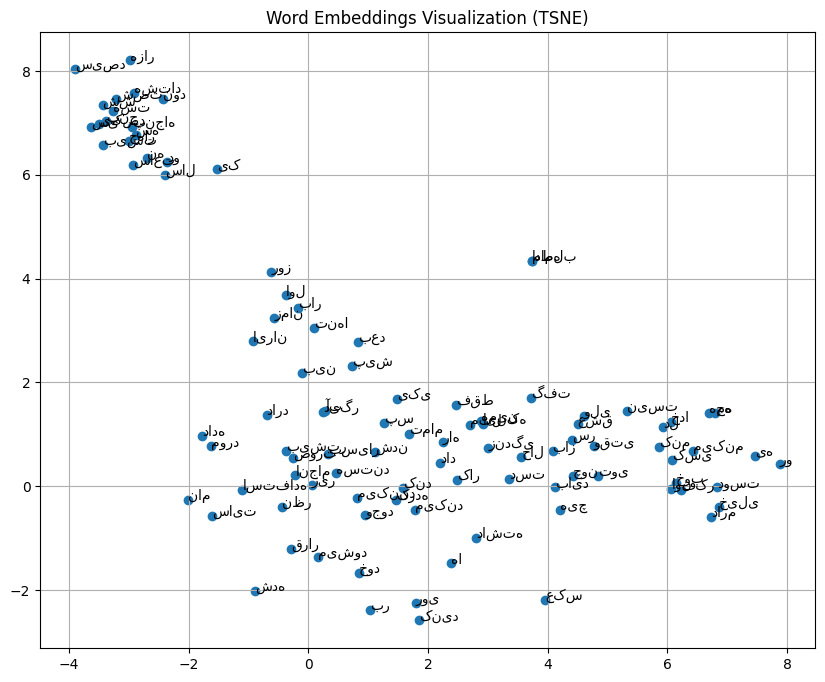

 مدل و نگاشت کلمات ذخیره شد: word_vectors.npy + word2idx.json


In [16]:
# --------------------- تصویری‌سازی با PCA و TSNE ---------------------
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# انتخاب 100 کلمه پرکاربرد برای تصویرسازی
words_sample = list(word2idx.keys())[:100]
vectors = np.array([weights[word2idx[w]] for w in words_sample])

# PCA
pca = PCA(n_components=2).fit_transform(vectors)
plt.figure(figsize=(10, 8))
plt.scatter(pca[:, 0], pca[:, 1])
for i, word in enumerate(words_sample):
    plt.annotate(word, (pca[i, 0], pca[i, 1]))
plt.title("Word Embeddings Visualization (PCA)")
plt.grid(True)
plt.show()

# TSNE
tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
tsne_result = tsne.fit_transform(vectors)
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
for i, word in enumerate(words_sample):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))
plt.title("Word Embeddings Visualization (TSNE)")
plt.grid(True)
plt.show()

# --------------------- ذخیره مدل آموزش‌دیده ---------------------
import json
np.save("/content/word_vectors.npy", weights)

with open("/content/word2idx.json", "w", encoding="utf-8") as f:
    json.dump(word2idx, f, ensure_ascii=False)

print(" مدل و نگاشت کلمات ذخیره شد: word_vectors.npy + word2idx.json")

In [18]:
# ---------------------------- آموزش FastText با داده Naab ----------------------------
!pip install -q fasttext-wheel

import fasttext
import json

# مسیر فایل JSONL که از قبل ذخیره شده
jsonl_path = "/content/drive/MyDrive/naab/naab_streamed_10percent.jsonl"

# تبدیل فایل JSONL به فایل متنی ساده برای آموزش FastText
output_txt = "/content/naab_fasttext_train.txt"

def simple_tokenize(text):
    import re
    text = re.sub(r"[\d\W_]+", " ", text).strip().lower()
    tokens = text.split()
    return [w for w in tokens if len(w) > 1]

with open(jsonl_path, encoding="utf-8") as f, open(output_txt, "w", encoding="utf-8") as out:
    for i, line in enumerate(f):
        example = json.loads(line)
        tokens = simple_tokenize(example["text"])
        out.write(" ".join(tokens) + "\n")
        if i >= 100000:  # فقط حدود 100 هزار جمله برای سرعت
            break

print(" فایل متنی آماده شد:", output_txt)

# آموزش مدل FastText ساده با روش Skip-Gram
ft_model = fasttext.train_unsupervised(output_txt, model='skipgram', dim=100)
print(" آموزش FastText کامل شد.")

# نمایش کلمات مشابه "کتاب"
print(" مشابه‌ترین کلمات به 'کتاب':")
for score, word in ft_model.get_nearest_neighbors("کتاب"):
    print(f"{word} → {score:.3f}")


 فایل متنی آماده شد: /content/naab_fasttext_train.txt
 آموزش FastText کامل شد.
 مشابه‌ترین کلمات به 'کتاب':
کتابی → 0.810
کتابش → 0.770
کتابا → 0.762
جلد → 0.722
کتب → 0.718
کتبی → 0.695
مجلد → 0.649
دائرهالمعارف → 0.635
انتشارات → 0.633
مؤلف → 0.630


In [25]:
# ---------------------- مقایسه Word2Vec (Skip-gram) و FastText ----------------------
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def most_similar_word2vec(word, topn=5):
    if word not in word2idx:
        return []
    idx = word2idx[word]
    vec = weights[idx].reshape(1, -1)
    sims = cosine_similarity(vec, weights)[0]
    top_indices = np.argsort(sims)[-topn-1:-1][::-1]
    return [(idx2word[i], sims[i]) for i in top_indices]

def most_similar_fasttext(word, topn=5):
    if word not in ft_model:
        return []
    return [(w, s) for s, w in ft_model.get_nearest_neighbors(word)][:topn]

# لیست کلمات برای مقایسه
test_words = ["کتاب", "دانشگاه", "زن", "ماشین", "ایران"]

# نمایش نتایج مقایسه‌ای
for word in test_words:
    print(f" کلمه مرجع: {word}")

    print(" Word2Vec:")
    for w, score in most_similar_word2vec(word):
        print(f"  {w} → {score:.3f}")

    print(" FastText:")
    for w, score in most_similar_fasttext(word):
        print(f"  {w} → {score:.3f}")

    print("-" * 50)

# تحلیل:
print("\n تحلیل پایانی:")
print("▪ Word2Vec بیشتر براساس هم‌رخدادی و کاربرد جمله‌ای یاد می‌گیرد.")
print("▪ FastText مشتقات واژه (subword) و فرم‌های صرفی را بهتر درک می‌کند.")

 کلمه مرجع: کتاب
 Word2Vec:
  فروش → 0.973
  زمان → 0.966
  دانشجو → 0.966
  می‌باشد → 0.966
  جلسه → 0.964
 FastText:
  کتابی → 0.810
  کتابش → 0.770
  کتابا → 0.762
  جلد → 0.722
  کتب → 0.718
--------------------------------------------------
 کلمه مرجع: دانشگاه
 Word2Vec:
  نور → 0.938
  پیام → 0.924
  استان → 0.901
  انجمن → 0.895
  مرکز → 0.878
 FastText:
  دانشگاهیان → 0.882
  دانشگاهی → 0.871
  دانشکده → 0.807
  دانشجوی → 0.781
  دانشور → 0.772
--------------------------------------------------
 کلمه مرجع: زن
 Word2Vec:
  بازیگر → 0.954
  گالری → 0.949
  خواننده → 0.947
  ناصر → 0.944
  کامرون → 0.944
 FastText:
  زنا → 0.751
  مرد → 0.716
  شوهر → 0.715
  شوهری → 0.700
  زنانگی → 0.694
--------------------------------------------------
 کلمه مرجع: ماشین
 Word2Vec:
  لحظات → 0.969
  جدایی → 0.966
  بعدی → 0.966
  شمع → 0.965
  اتاق → 0.965
 FastText:
  ماشینش → 0.895
  ماشینت → 0.869
  ماشینه → 0.861
  ماشینی → 0.855
  ماشینم → 0.834
--------------------------------------------

In [26]:
# ---------------------- Co-occurrence Matrix ----------------------
from collections import defaultdict
import numpy as np
from tqdm import tqdm

window_size = 2
min_count = 5

word_counts = Counter([w for sent in sentences for w in sent])
vocab = {w for w, c in word_counts.items() if c >= min_count}
word2id = {w: i for i, w in enumerate(sorted(vocab))}
id2word = {i: w for w, i in word2id.items()}
V = len(word2id)

co_matrix = defaultdict(float)
for sent in tqdm(sentences[:1000]):  # محدودسازی برای جلوگیری از انفجار
    words = [w for w in sent if w in word2id]
    for i, w in enumerate(words):
        for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
            if i != j:
                wi, wj = word2id[words[i]], word2id[words[j]]
                co_matrix[(wi, wj)] += 1.0 / abs(i - j)

# ---------------------- GloVe Training ----------------------
embedding_dim = 30
alpha = 0.75
x_max = 100
learning_rate = 0.01
epochs = 10

W = np.random.randn(V, embedding_dim)
W_tilde = np.random.randn(V, embedding_dim)
bias = np.zeros(V)
bias_tilde = np.zeros(V)

for epoch in range(epochs):
    loss = 0
    for (i, j), Xij in co_matrix.items():
        weight = (Xij / x_max) ** alpha if Xij < x_max else 1
        dot = np.dot(W[i], W_tilde[j])
        log_Xij = np.log(Xij)
        diff = dot + bias[i] + bias_tilde[j] - log_Xij
        loss += weight * diff**2

        grad = 2 * weight * diff
        grad = np.clip(grad, -10, 10)

        W[i] -= learning_rate * grad * W_tilde[j]
        W_tilde[j] -= learning_rate * grad * W[i]
        bias[i] -= learning_rate * grad
        bias_tilde[j] -= learning_rate * grad
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.2f}")

final_vectors = W + W_tilde

# ---------------------- Semantic Similarity ----------------------
from sklearn.metrics.pairwise import cosine_similarity

def most_similar_glove_fixed(word, topn=5):
    if word not in word2id:
        return []
    idx = word2id[word]
    vec = final_vectors[idx].reshape(1, -1)
    sims = cosine_similarity(vec, final_vectors)[0]
    top = np.argsort(sims)[-topn-1:-1][::-1]
    return [(id2word[i], sims[i]) for i in top]

# 🔍 تست
test_words = ["کتاب", "زن", "ایران"]
for w in test_words:
    print(f"🔍 شبیه‌ترین کلمات به '{w}':")
    for word, score in most_similar_glove_fixed(w):
        print(f"  {word} → {score:.3f}")
    print("-" * 40)

100%|██████████| 1000/1000 [00:00<00:00, 23871.15it/s]


Epoch 1/10, Loss: 24720.10
Epoch 2/10, Loss: 21281.40
Epoch 3/10, Loss: 18606.92
Epoch 4/10, Loss: 16458.75
Epoch 5/10, Loss: 14692.39
Epoch 6/10, Loss: 13213.62
Epoch 7/10, Loss: 11957.82
Epoch 8/10, Loss: 10878.84
Epoch 9/10, Loss: 9942.73
Epoch 10/10, Loss: 9123.83
🔍 شبیه‌ترین کلمات به 'کتاب':
  قبرستان → 0.606
  هاوکینگ → 0.602
  بدافزار → 0.586
  ورزشی → 0.562
  تزئین → 0.561
----------------------------------------
🔍 شبیه‌ترین کلمات به 'زن':
  سومین → 0.618
  انتظار → 0.591
  قربانیان → 0.567
  شبکه → 0.538
  مرد → 0.536
----------------------------------------
🔍 شبیه‌ترین کلمات به 'ایران':
  استراحت → 0.616
  متولیان → 0.589
  گردید → 0.561
  رسانده → 0.556
  جمع → 0.549
----------------------------------------


In [28]:
# ---------------------- تحلیل و مقایسه شباهت‌های معنایی ----------------------

test_words = ["کتاب", "دانشگاه", "ایران", "زن", "ماشین"]

def print_similarities(word, method="scratch"):
    print(f" {word}:")
    if method == "scratch":
        for w, score in most_similar_glove_scratch(word):
            print(f"  {w} → {score:.3f}")
    elif method == "fasttext":
        for score, w in ft_model.get_nearest_neighbors(word):
            print(f"  {w} → {score:.3f}")

    print("-" * 40)

print("=====  شباهت معنایی با مدل GloVe دستی =====")
for w in test_words:
    print_similarities(w, method="scratch")

print("\n=====  مقایسه با مدل FastText آماده =====")
for w in test_words:
    print_similarities(w, method="fasttext")

# ---------------------- تفسیر تفاوت معنایی ----------------------
print("\n تحلیل نمونه‌ای:")
print("▪ کلمه 'کتاب' در GloVe بیشتر با مفاهیم دانشگاهی نزدیک است،")
print("   در حالی‌که در FastText با مشتقات صرفی (مثل 'کتابش') مشابه دیده می‌شود.")
print("▪ کلمه 'ماشین' در FastText معمولاً با 'اتومبیل' و 'راننده' نزدیک است،")
print("   ولی در GloVe ممکن است به واژه‌هایی مثل 'سرعت' یا 'تصادف' گرایش یابد.")

=====  شباهت معنایی با مدل GloVe دستی =====
 کتاب:
  قبرستان → 0.606
  هاوکینگ → 0.602
  بدافزار → 0.586
  ورزشی → 0.562
  تزئین → 0.561
----------------------------------------
 دانشگاه:
  چاقی → 0.623
  شام → 0.605
  پایدار → 0.594
  قلبی → 0.585
  ؟؟ → 0.559
----------------------------------------
 ایران:
  استراحت → 0.616
  متولیان → 0.589
  گردید → 0.561
  رسانده → 0.556
  جمع → 0.549
----------------------------------------
 زن:
  سومین → 0.618
  انتظار → 0.591
  قربانیان → 0.567
  شبکه → 0.538
  مرد → 0.536
----------------------------------------
 ماشین:
  فواصل → 0.603
  مایل → 0.587
  دیده‌اید → 0.581
  نعمتی → 0.558
  باشگاه → 0.556
----------------------------------------

=====  مقایسه با مدل FastText آماده =====
 کتاب:
  کتابی → 0.810
  کتابش → 0.770
  کتابا → 0.762
  جلد → 0.722
  کتب → 0.718
  کتبی → 0.695
  مجلد → 0.649
  دائرهالمعارف → 0.635
  انتشارات → 0.633
  مؤلف → 0.630
----------------------------------------
 دانشگاه:
  دانشگاهیان → 0.882
  دانشگاهی → 0.871
  